In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import build_data_functions as bdf

In [2]:
resident_foreigners_norm = pd.read_table("/home/sara/Documents/Immigration/Shared_statistics/Data_final/resident_foreigners_norm.csv")
provinces = sorted(list(set(resident_foreigners_norm["Province"])))
regions_data = pd.read_table("/home/sara/Documents/Immigration/Shared_statistics/Data_final/regioni.csv")
regions_data = regions_data.replace(['Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento'], ['Bolzano / Bozen', 'Trento'])
regions = sorted(list(set(regions_data["Regione"])))
zones_data = pd.read_table("/home/sara/Documents/Immigration/Shared_statistics/Data_final/territori.csv")
zones_data = zones_data.replace(['Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento'], ['Bolzano / Bozen', 'Trento'])

zones = sorted(list(set(zones_data["Zona"])))
years = sorted(list(set(resident_foreigners_norm["Year"])))

basic_info = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/prov_cap_info.csv", header=None, names = ["Province", "Region Code", "Population", "Area", "Density", "Num Municipalities"])
basic_info_additional = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/region_info.csv", header=None, names = ["Province", "Region Code", "Population", "Area", "Density", "Num Municipalities"])

In [3]:
'''regions = replace_in_list(regions, ['Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento'], ['Bolzano / Bozen', 'Trento'])
basic_info_additional = basic_info_additional.replace(['Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento'], ['Bolzano / Bozen', 'Trento'])'''

"regions = replace_in_list(regions, ['Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento'], ['Bolzano / Bozen', 'Trento'])\nbasic_info_additional = basic_info_additional.replace(['Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento'], ['Bolzano / Bozen', 'Trento'])"

In [4]:
basic_info.head()

,Province,Region Code,Population,Area,Density,Num Municipalities
0,agrigento,sic,442.049,"3.052,59",145.0,43
1,alessandria,pie,426.658,"3.558,83",120.0,188
2,ancona,mar,474.124,"1.963,22",242.0,47
3,aosta,vda,126.883,"3.260,90",39.0,74
4,arezzo,tos,344.374,"3.233,08",107.0,36


In [5]:
basic_info["Region Code"] = [i.upper() for i in basic_info["Region Code"]]

In [6]:
basic_info["Province"] = [i.title() for i in basic_info["Province"]]
basic_info["Province"] = basic_info["Province"].replace(["Aosta", "Bolzano", "Monza E Della Brianza", "Pesaro E Urbino", "Reggio Calabria", "Reggio Emilia", "Roma Capitale"], ["Valle d'Aosta / Vallée d'Aoste", "Bolzano / Bozen", "Monza e della Brianza", "Pesaro e Urbino", "Reggio di Calabria", "Reggio nell'Emilia", "Roma"])

In [8]:
# Add manually (from Wikipedia the missing information)
basic_info = bdf.add_row(basic_info, [["Medio Campidano", "SAR", "99.422", "1.157,34", 65.52, 28], 
                                  ["Carbonia-Iglesias", "SAR", "127.133", "1.499,71", 84.77, 23], 
                                  ["Olbia-Tempio", "SAR", "160.368", "3.406,18", 48.08, 26], 
                                  ["Oristano", "SAR", "159.474", "2.990,45", 53.33, 87],
                                 ["Sud", "-", "14.071.161", "73.223", 192.17, "-"],
                                 ["Centro", "-", "12.067.524", "58.052", 207.89, "-"],
                                 ["Isole", "-", "6.709.776", "49.932", 134.37, "-"],
                                 ["Nord-est", "-", "11.564.416", "62.310", 185.59, "-"],
                                 ["Nord-ovest", "-", "16.137.227", "57.950", 275.63, "-"]])

In [9]:
basic_info = basic_info.sort_values(["Province"])

basic_info = basic_info[basic_info["Province"] != "Sud Sardegna"]

basic_info.index = list(range(len(basic_info)))

In [10]:
basic_info["Area"] = [float(i.replace(".", "").replace(",", ".")) for i in basic_info["Area"]]
basic_info["Population"] = [float(i.replace(".", "").replace(",", ".")) for i in basic_info["Population"]]

In [11]:
basic_info.head()

,Province,Region Code,Population,Area,Density,Num Municipalities
0,Agrigento,SIC,442049.0,3052.59,145.0,43
1,Alessandria,PIE,426658.0,3558.83,120.0,188
2,Ancona,MAR,474124.0,1963.22,242.0,47
3,Arezzo,TOS,344374.0,3233.08,107.0,36
4,Ascoli Piceno,MAR,209450.0,1228.27,171.0,33


In [12]:
interest_territories = provinces + regions + zones + ["Italia"]

In [13]:
basic_info_additional["Region Code"] = [i.upper() for i in basic_info_additional["Region Code"]]

In [14]:
dataset = basic_info_additional.append(basic_info, ignore_index=True)

In [15]:
dataset = bdf.filtering(dataset, "Province", interest_territories)
dataset = dataset.sort_values(["Province"])
dataset = dataset.drop_duplicates(["Province"])
dataset = dataset.set_index("Province")

In [16]:
dataset.head()

,Region Code,Population,Area,Density,Num Municipalities
Province,,,,,
Abruzzo,ABR,1322247.0,10831.84,122.07,305
Agrigento,SIC,442049.0,3052.59,145.00,43
Alessandria,PIE,426658.0,3558.83,120.00,188
Ancona,MAR,474124.0,1963.22,242.00,47
Arezzo,TOS,344374.0,3233.08,107.00,36


In [17]:
resident_foreigners_norm.head()

,Province,Country,Year,Gender,Value
0,Biella,AND,2005,male,1
1,Biella,AND,2005,female,0
2,Novara,AND,2005,male,0
3,Novara,AND,2005,female,2
4,Alessandria,AND,2017,male,0


In [18]:
grouped = regions_data.groupby(["Regione"])
for r in regions:
    #print(r, grouped.get_group(r)["Provincia"].values)
    list_temp = grouped.get_group(r)["Provincia"].values
    res_temp = resident_foreigners_norm[(resident_foreigners_norm["Province"].isin(list_temp))].groupby(["Country", "Year", "Gender"])["Value"].sum()
    temp = pd.DataFrame(res_temp)
    temp = temp.reset_index(level=['Country', 'Year', 'Gender'])
    temp["Province"] = [r for i in range(len(temp))]
    temp = temp[temp.columns.tolist()[-1:] + temp.columns.tolist()[:-1]]
    
    resident_foreigners_norm = pd.concat([resident_foreigners_norm, temp])
    
resident_foreigners_norm.index = list(range(len(resident_foreigners_norm)))

In [19]:
grouped = zones_data.groupby(["Zona"])
for z in zones:
    #print(r, grouped.get_group(r)["Provincia"].values)
    list_temp = grouped.get_group(z)["Regione"].values
    res_temp = resident_foreigners_norm[(resident_foreigners_norm["Province"].isin(list_temp))].groupby(["Country", "Year", "Gender"])["Value"].sum()
    temp = pd.DataFrame(res_temp)
    temp = temp.reset_index(level=['Country', 'Year', 'Gender'])
    temp["Province"] = [z for i in range(len(temp))]
    temp = temp[temp.columns.tolist()[-1:] + temp.columns.tolist()[:-1]]
    
    resident_foreigners_norm = pd.concat([resident_foreigners_norm, temp])
    
resident_foreigners_norm.index = list(range(len(resident_foreigners_norm)))

In [20]:
resident_foreigners_norm.head()

,Province,Country,Year,Gender,Value
0,Biella,AND,2005,male,1
1,Biella,AND,2005,female,0
2,Novara,AND,2005,male,0
3,Novara,AND,2005,female,2
4,Alessandria,AND,2017,male,0


### Correlation - basic info

Since these features are time invariant, it is reasonable to study the correlation with the mean immigrant stock.

In [21]:
mean_stock = resident_foreigners_norm.groupby(["Province"])["Value"].sum()

data_temp = pd.concat([dataset, mean_stock], axis=1)
#data_temp = data_temp.reset_index(level=["Province"])

In [22]:
cols = data_temp.columns[(data_temp.columns != "Region Code") & (data_temp.columns != "Num Municipalities") & (data_temp.columns != "Value")]

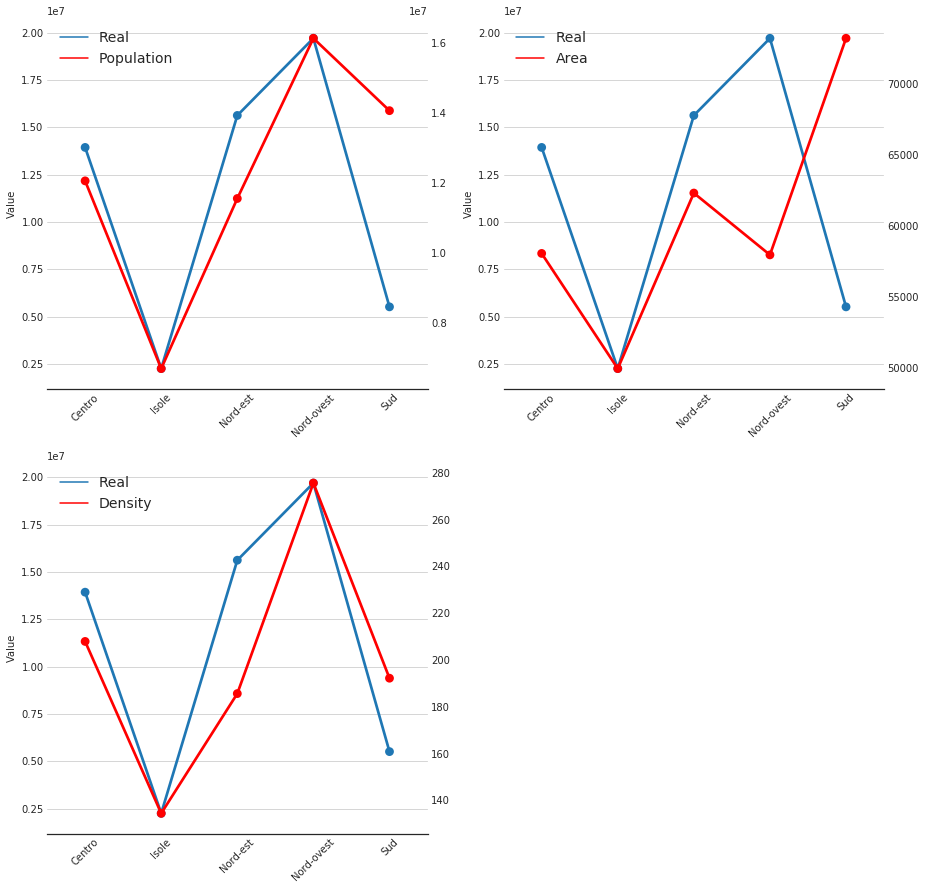

In [23]:
bdf.relation_plot_time_invariant(data_temp.loc[zones], cols, "Value", 45)

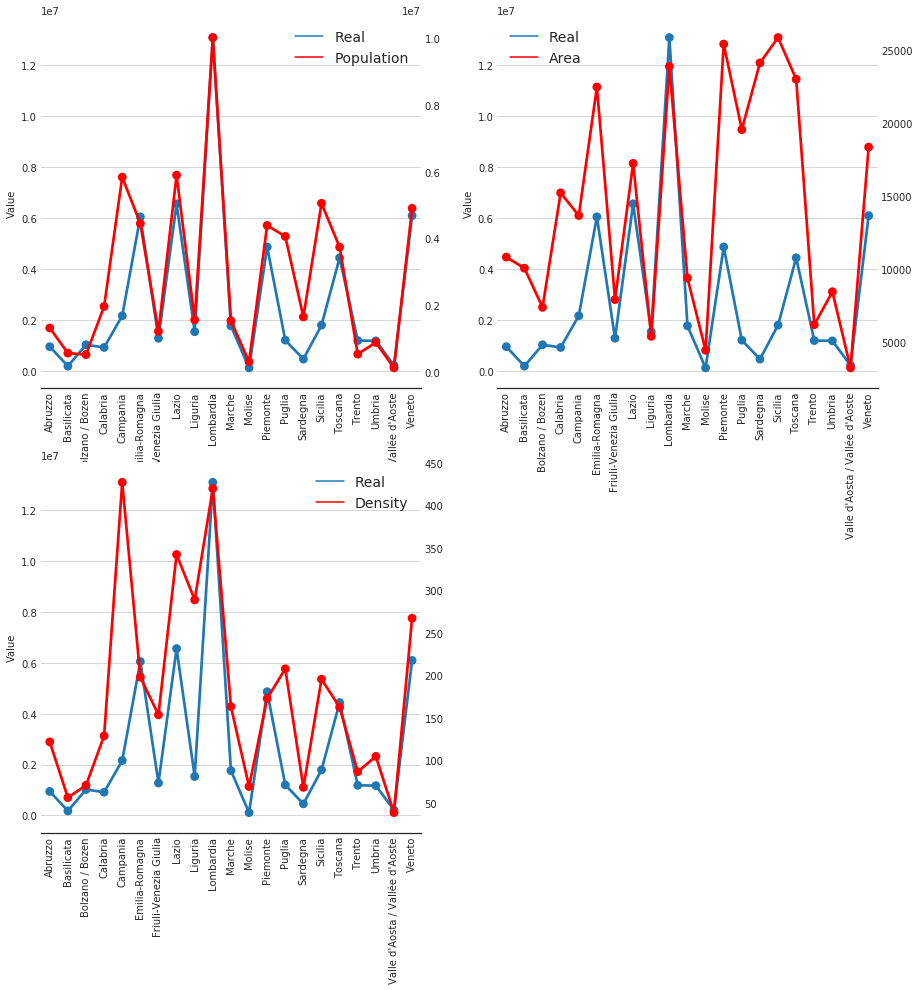

In [24]:
bdf.relation_plot_time_invariant(data_temp.loc[regions], cols, "Value", 90)

## Istat Data

### Aspect of daily life - social activities

In [25]:
social_act = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Aspects of daily life/DCCV_AVQ_PERSONE_Data_433028ae-6be5-4ff0-8727-911694df70d2.csv", sep = "\t")

In [26]:
social_act = bdf.re_ordering_df(social_act)
bdf.drop_useless(social_act)

Classe di età {'14 anni e più'}
Condizione e posizione nella professione {'totale'}
Sesso {'totale'}
Titolo di studio {'totale'}


In [27]:
social_act = bdf.filtering(social_act, "Territorio", interest_territories)
social_act = bdf.filtering(social_act, "Seleziona periodo", years)

In [28]:
set(social_act["Misura"])

{'per 100 persone con le stesse caratteristiche', 'valori in migliaia'}

In [29]:
social_act = bdf.differentiate_values(social_act, "Misura", "Tipo dato")
social_act = bdf.pivot(social_act, "Tipo dato", "0  Flags")

In [32]:
'''social_act_same_char, social_act_thousand = divide_table(social_act, "Misura")

social_act_same_char = pivot(social_act_same_char, "Tipo dato", "0  Flags")
social_act_thousand = pivot(social_act_thousand, "Tipo dato", "0  Flags")

print(social_act_same_char.isnull().sum().sum(), social_act_thousand.isnull().sum().sum())'''

'social_act_same_char, social_act_thousand = divide_table(social_act, "Misura")\n\nsocial_act_same_char = pivot(social_act_same_char, "Tipo dato", "0  Flags")\nsocial_act_thousand = pivot(social_act_thousand, "Tipo dato", "0  Flags")\n\nprint(social_act_same_char.isnull().sum().sum(), social_act_thousand.isnull().sum().sum())'

In [30]:
bdf.del_missing(social_act)

In [31]:
print(social_act.index.levels[0])
print(social_act.index.levels[1])

Int64Index([2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016],
           dtype='int64', name='Seleziona periodo')
Index(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Centro',
       'Emilia-Romagna', 'Friuli-Venezia Giulia', 'Isole', 'Italia', 'Lazio',
       'Liguria', 'Lombardia', 'Marche', 'Molise', 'Nord-est', 'Nord-ovest',
       'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Sud', 'Toscana', 'Umbria',
       'Valle d'Aosta / Vallée d'Aoste', 'Veneto'],
      dtype='object', name='Territorio')


In [32]:
bdf.check_missing_index(social_act, years, [i for i in interest_territories if i not in provinces])

[2004, 2017]
[]


In [33]:
bdf.check_missing(social_act)

ALL the data for the 2004 are missing, two options:
- do not consider these attributes for the 2004
- reconstruct the 2004 data from the other data: mean of 2003 and 2004;

In [34]:
social_act.head()

Tipo dato                     attività gratuita per un sindacato - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                                       
2003              Abruzzo                                                   0.8                                    
                  Basilicata                                                2.0                                    
                  Calabria                                                  1.3                                    
                  Campania                                                  1.1                                    
                  Centro                                                    1.6                                    

Tipo dato                     attività gratuita per un sindacato - valori in migliaia  \
Seleziona periodo Territorio                                                            
2003              Abruzzo                                                   8.0         
                  Basilicata                                               10.0         
                  Calabria                                                 22.0         
                  Campania                                                 55.0         
                  Centro                                                  155.0         

Tipo dato                     attività gratuite in associazioni di volontariato - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                                                      
2003              Abruzzo                                                   5.9                                                   
                  Basilicata                                                6.4                                                   
                  Calabria                                                  4.1                                                   
                  Campania                                                  4.5                                                   
                  Centro                                                    7.5                                                   

Tipo dato                     attività gratuite in associazioni di volontariato - valori in migliaia  \
Seleziona periodo Territorio                                                                           
2003              Abruzzo                                                  66.0                        
                  Basilicata                                               33.0                        
                  Calabria                                                 70.0                        
                  Campania                                                215.0                        
                  Centro                                                  720.0                        

Tipo dato                     attività gratuite in associazioni non di volontariato - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                                                          
2003              Abruzzo                                                   2.9                                                       
                  Basilicata                                                3.4                                                       
                  Calabria                                                  1.5                                                       
                  Campania                                                  2.0                                                       
                  Centro                                                    3.0                           

## IMPORTANT! Example to extract data: a.loc[2001].loc["Abruzzo"]

### Aspect of daily life - Political Information (freq)

In [35]:
political_information = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Aspects of daily life (1)/DCCV_AVQ_PERSONE_Data_e9f78b71-f4aa-4340-828b-9ba102742fab.csv", sep = "\t")

In [36]:
social_act = bdf.re_ordering_df(political_information)
bdf.drop_useless(political_information)

Sesso {'totale'}
Classe di età {'14 anni e più'}
Titolo di studio {'totale'}
Condizione e posizione nella professione {'totale'}


In [37]:
political_information = bdf.filtering(political_information, "Territorio", interest_territories)
political_information = bdf.filtering(political_information, "Seleziona periodo", years)

In [38]:
set(political_information["Misura"])

{'per 100 persone con le stesse caratteristiche', 'valori in migliaia'}

In [39]:
'''political_information_same_char, political_information_thousand = divide_table(political_information, "Misura")

political_information_same_char = pivot(political_information_same_char, "Tipo dato", "0  Flags")
political_information_thousand = pivot(political_information_thousand, "Tipo dato", "0  Flags")'''

'political_information_same_char, political_information_thousand = divide_table(political_information, "Misura")\n\npolitical_information_same_char = pivot(political_information_same_char, "Tipo dato", "0  Flags")\npolitical_information_thousand = pivot(political_information_thousand, "Tipo dato", "0  Flags")'

In [40]:
political_information = bdf.differentiate_values(political_information, "Misura", "Tipo dato")
political_information = bdf.pivot(political_information, "Tipo dato", "0  Flags")

In [41]:
bdf.check_missing_index(political_information, years, [i for i in interest_territories if i not in provinces])

[2004, 2017]
[]


In [42]:
bdf.check_missing(political_information)

In [43]:
political_information.head()

Tipo dato                     mai - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                        
2003              Abruzzo                                                  28.1     
                  Basilicata                                               35.1     
                  Calabria                                                 39.6     
                  Campania                                                 36.0     
                  Centro                                                   22.2     

Tipo dato                     mai - valori in migliaia  \
Seleziona periodo Territorio                             
2003              Abruzzo                        312.0   
                  Basilicata                     179.0   
                  Calabria                       676.0   
                  Campania                      1716.0   
                  Centro                        2142.0   

Tipo dato                     qualche volta a settimana - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                              
2003              Abruzzo                                                  21.8                           
                  Basilicata                                               17.2                           
                  Calabria                                                 16.5                           
                  Campania                                                 21.9                           
                  Centro                                                   19.3                           

Tipo dato                     qualche volta a settimana - valori in migliaia  \
Seleziona periodo Territorio                                                   
2003              Abruzzo                                              243.0   
                  Basilicata                                            88.0   
                  Calabria                                             281.0   
                  Campania                                            1042.0   
                  Centro                                              1860.0   

Tipo dato                     qualche volta al mese - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                          
2003              Abruzzo                                                   8.6                       
                  Basilicata                                                9.1                       
                  Calabria                                                  7.5                       
                  Campania                                                  8.4                       
                  Centro                                                    8.1                       

Tipo dato                     qualche volta al mese - valori in migliaia  \
Seleziona periodo Territorio                                               
2003              Abruzzo                                           96.0   
                  Basilicata                                        46.0   
                  Calabria                                         128.0   
                  Campania                                         403.0   
                  Centro                                           780.0   

Tipo dato                     qualche volta all'anno - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                           
2003              Abruzzo                                                   6.4                        
                  Basilicata                                                9.8                        
               

### Consumption Expenditure (ECoicop)

In [44]:
consumption_expenditure = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Consumption expenditure/DCCV_SPEMEFAM_Data_a2f1960e-bec3-489b-8648-900273d1fc5f.csv", sep = "\t")

In [45]:
consumption_expenditure = bdf.re_ordering_df(consumption_expenditure)
bdf.drop_useless(consumption_expenditure)

Abitudine di spesa {'tutte le voci'}
Ampiezza familiare {'totale'}
Condizione professionale della persona di riferimento {'tutte le voci'}
Gruppo di spesa {'tutte le voci'}
Quantili di spesa totale equivalente {'tutte le voci'}
Tipo dato {'spesa media mensile familiare (in euro correnti)'}
Tipologia familiare {'totale famiglie'}
Titolo di studio più elevato conseguito dalla persona di riferimento {'totale'}


In [46]:
consumption_expenditure = bdf.filtering(consumption_expenditure, "Territorio", interest_territories)
consumption_expenditure = bdf.filtering(consumption_expenditure, "Seleziona periodo", years)

In [47]:
consumption_expenditure = bdf.pivot(consumption_expenditure, "Coicop", "0  Flags")

In [48]:
bdf.del_missing(consumption_expenditure)

In [49]:
bdf.check_missing_index(consumption_expenditure, years, [i for i in interest_territories if i not in provinces])

[2017]
[]


In [50]:
bdf.check_missing(consumption_expenditure)

In [52]:
consumption_expenditure.head()

Coicop                         -- abbigliamento e calzature  \
Seleziona periodo Territorio                                  
2003              Abruzzo                            193.22   
                  Basilicata                         145.80   
                  Calabria                           136.19   
                  Campania                           154.93   
                  Centro                             135.20   

Coicop                         -- abitazione, acqua, elettricità, gas e altri combustibili  \
Seleziona periodo Territorio                                                                 
2003              Abruzzo                                                612.51              
                  Basilicata                                             492.74              
                  Calabria                                               472.10              
                  Campania                                               582.38              
                  Centro                                                 918.50              

Coicop                         -- altri beni e servizi  \
Seleziona periodo Territorio                             
2003              Abruzzo                       179.83   
                  Basilicata                    114.43   
                  Calabria                      178.15   
                  Campania                      135.91   
                  Centro                        233.67   

Coicop                         -- bevande alcoliche e tabacchi  \
Seleziona periodo Territorio                                     
2003              Abruzzo                                34.92   
                  Basilicata                             41.08   
                  Calabria                               39.66   
                  Campania                               45.55   
                  Centro                                 40.41   

Coicop                         -- comunicazioni   -- istruzione  \
Seleziona periodo Territorio                                      
2003              Abruzzo                 73.74           10.15   
                  Basilicata              68.17            2.99   
                  Calabria                91.37            4.35   
                  Campania                71.40            9.06   
                  Centro                  79.00           10.71   

Coicop                         -- mobili, articoli e servizi per la casa  \
Seleziona periodo Territorio                                               
2003              Abruzzo                                          98.09   
                  Basilicata                                      124.78   
                  Calabria                                        133.62   
                  Campania                                        125.04   
                  Centro                                          141.21   

Coicop                         -- prodotti alimentari e bevande analcoliche  \
Seleziona periodo Territorio                                                  
2003              Abruzzo                                            398.15   
                  Basilicata                                         431.02   
                  Calabria                                           443.22   
                  Campania                                           456.92   
                  Centro                                             433.19   

Coicop                         -- ricreazione, spettacoli e cultura  \
Seleziona periodo Territorio                                          
2003              Abruzzo                                    109.47   
                  Basilicata                                  69.17   
                  Calabria                                   102.90   
                  Campania                                   136.09   
                  Centro                      

### Fertility Indicators

In [53]:
fertility_rate = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Fertility  indicators/DCIS_FECONDITA1_Data_a2326888-5b5c-4549-b696-d187b4055c39.csv", sep = "\t")

In [54]:
fertility_rate = bdf.re_ordering_df(fertility_rate)
bdf.drop_useless(fertility_rate)

Cittadinanza {'totale'}
Età della madre {'totale'}


In [55]:
fertility_rate = bdf.filtering(fertility_rate, "Territorio", interest_territories)
fertility_rate = bdf.filtering(fertility_rate, "Seleziona periodo", years)
#fertility_rate = filtering(fertility_rate, "Tipo dato", ["tasso di fecondità totale"])
#del fertility_rate["Tipo dato"]

In [56]:
fertility_rate = bdf.pivot(fertility_rate, "Tipo dato", "0  Flags")

In [57]:
bdf.del_missing(fertility_rate)

In [58]:
bdf.check_missing_index(fertility_rate, years, interest_territories)

[2017]
[]


In [59]:
bdf.check_missing(fertility_rate)

In [60]:
fertility_rate.head()

Tipo dato                      età media dei padri alla nascita del figlio  \
Seleziona periodo Territorio                                                 
2003              Abruzzo                                            34.80   
                  Agrigento                                          33.99   
                  Alessandria                                        35.08   
                  Ancona                                             34.77   
                  Arezzo                                             34.59   

Tipo dato                      età media delle madri al parto  \
Seleziona periodo Territorio                                    
2003              Abruzzo                               31.17   
                  Agrigento                             29.86   
                  Alessandria                           31.13   
                  Ancona                                30.93   
                  Arezzo                                30.94   

Tipo dato                      tasso di fecondità totale  
Seleziona periodo Territorio                              
2003              Abruzzo                           1.19  
                  Agrigento                         1.40  
                  Alessandria                       1.08  
                  Ancona                            1.20  
                  Arezzo                            1.17

### Net Income - Homogeneity of regional income

In [61]:
homogeneity_net_income = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Homogeneity of regional income/DCCV_GINIREDD_Data_f031238d-d03b-414a-ad9d-5ea35513cb24.csv", sep = "\t")

In [62]:
homogeneity_net_income = bdf.re_ordering_df(homogeneity_net_income)
bdf.drop_useless(homogeneity_net_income)

Misura {'indice di gini'}
Tipo dato {'omogeneità nella distribuzione del reddito netto familiare'}


In [63]:
homogeneity_net_income = bdf.filtering(homogeneity_net_income, "Territorio", interest_territories)
homogeneity_net_income = bdf.filtering(homogeneity_net_income, "Seleziona periodo", years)

In [64]:
homogeneity_net_income = bdf.pivot(homogeneity_net_income, "Presenza affitti imputati", "0  Flags")

In [65]:
bdf.del_missing(homogeneity_net_income)

In [66]:
bdf.check_missing_index(homogeneity_net_income, years, [i for i in interest_territories if i not in provinces])

[2016, 2017]
[]


In [67]:
bdf.check_missing(homogeneity_net_income)

In [68]:
homogeneity_net_income.head()

Presenza affitti imputati     esclusi fitti imputati  inclusi fitti imputati
Seleziona periodo Territorio                                                
2003              Abruzzo                      0.296                   0.271
                  Basilicata                   0.279                   0.260
                  Calabria                     0.324                   0.305
                  Campania                     0.360                   0.341
                  Centro                       0.323                   0.293

### Housing costs

In [69]:
housing_costs = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Housing costs/DCCV_ABITSPESA_Data_86e7f7b3-4f27-4d2a-bcda-94af693e24af.csv", sep = "\t")

In [70]:
housing_costs = bdf.re_ordering_df(housing_costs)
bdf.drop_useless(housing_costs)

Classe di età del principale percettore {'totale'}
Condizione professionale prevalente nell anno del principale percettore {'totale'}
Numero di anziani in famiglia {'totale'}
Numero di componenti {'totale'}
Numero di minori in famiglia {'totale'}
Sesso del principale percettore {'totale'}
Tipologia familiare {'totale'}
Titolo di godimento dell abitazione {'totale'}
Titolo di studio del principale percettore {'totale'}


In [71]:
housing_costs = bdf.filtering(housing_costs, "Territorio", interest_territories)
housing_costs = bdf.filtering(housing_costs, "Seleziona periodo", years)

In [72]:
housing_costs = bdf.pivot(housing_costs, "Indicatore di spesa", "0  Flags")

In [73]:
bdf.del_missing(housing_costs)

In [74]:
bdf.check_missing_index(housing_costs, years, [i for i in interest_territories if i not in provinces])

[2003, 2017]
[]


In [75]:
bdf.check_missing(housing_costs)

In [76]:
housing_costs.head()

Indicatore di spesa           spesa media mensile per abitazione (in euro)  \
Seleziona periodo Territorio                                                 
2004              Abruzzo                                            260.0   
                  Basilicata                                         209.0   
                  Calabria                                           215.0   
                  Campania                                           244.0   
                  Centro                                             300.0   

Indicatore di spesa           spesa media mensile per abitazioni (per 100 euro di reddito medio mensile)  
Seleziona periodo Territorio                                                                              
2004              Abruzzo                                                  12.2                           
                  Basilicata                                               11.8                           
                  Calabria                                                 12.5                           
                  Campania                                                 12.7                           
                  Centro                                                   12.5

### Live Births

In [77]:
live_births = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Live births/DCIS_NATI1_Data_fc109807-f48b-4e01-b9e7-81fddf031fbb.csv", sep = "\t")

In [78]:
live_births = bdf.re_ordering_df(live_births)
bdf.drop_useless(live_births)

Anno di nascita della madre {'tutte le voci'}
Area geografica di nascita {'tutte le voci'}
Cittadinanza della madre {'totale'}
Cittadinanza estera del nato {'Mondo'}
Età del padre {'totale'}
Età della madre {'totale'}
Nati vivi all'interno del matrimonio {'totale'}
Stato civile del padre {'totale'}
Stato civile della madre {'totale'}
Tipologia di coppia dei genitori {'tutte le voci'}


In [79]:
live_births = bdf.filtering(live_births, "Territorio di residenza", interest_territories)
live_births = bdf.filtering(live_births, "Seleziona periodo", years)

In [80]:
live_births = bdf.pivot(live_births, "Tipo dato", "0  Flags")

In [81]:
bdf.del_missing(live_births)

In [82]:
bdf.check_missing_index(live_births, years, [i for i in interest_territories if i not in provinces])

[2017]
[]


In [83]:
bdf.check_missing(live_births)

In [84]:
live_births.head()

Tipo dato                                  nati vivi - dati corretti (110 province)  \
Seleziona periodo Territorio di residenza                                             
2003              Abruzzo                                                     10971   
                  Basilicata                                                   5265   
                  Calabria                                                    18809   
                  Campania                                                    65194   
                  Centro                                                      99350   

Tipo dato                                  nati vivi - senza correzione (110 province)  
Seleziona periodo Territorio di residenza                                               
2003              Abruzzo                                                        10403  
                  Basilicata                                                      5166  
                  Calabria                                                       18621  
                  Campania                                                       63835  
                  Centro                                                         96333

### Unemployment

In [85]:
unemployment = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Unemployment/DCCV_DISOCCUPT1_Data_b7a54223-3ec4-4d1b-883e-a20d10fb350d.csv", sep = "\t")

In [86]:
unemployment = bdf.re_ordering_df(unemployment)
bdf.drop_useless(unemployment)

Cittadinanza {'totale'}
Classe di età {'15 anni e più'}
Condizione professionale {'totale'}
Durata della disoccupazione {'totale'}
Tipo dato {'persone in cerca di occupazione 15 anni e oltre (migliaia)'}
Titolo di studio {'totale'}


In [87]:
unemployment = bdf.filtering(unemployment, "Territorio", interest_territories)
unemployment = bdf.filtering(unemployment, "Seleziona periodo", years)

In [88]:
unemployment = bdf.pivot(unemployment, "Sesso", "0  Flags")

In [89]:
bdf.del_missing(unemployment)

In [90]:
bdf.check_missing_index(unemployment, years, interest_territories)

[2017]
['Bolzano / Bozen', 'Trento', 'Bolzano / Bozen', 'Trento', 'Isole', 'Sud']


In [91]:
bdf.check_missing(unemployment)

In [92]:
unemployment.head()

Sesso                         femmine   maschi   totale
Seleziona periodo Territorio                           
2003              Abruzzo      24.398   18.973   43.371
                  Basilicata   15.591   14.420   30.010
                  Calabria     58.955   59.607  118.561
                  Campania    185.498  169.419  354.917
                  Centro      200.754  131.944  332.699

### Aspects of daily life - work degree of satisfaction

In [93]:
work_satisfaction = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Aspects of daily life (3)/DCCV_AVQ_PERSONE_Data_4955ab2a-d94b-4381-ba06-12822e7e57e9.csv", sep = "\t")

In [94]:
work_satisfaction = bdf.re_ordering_df(work_satisfaction)
bdf.drop_useless(work_satisfaction)

work_satisfaction = bdf.filtering(work_satisfaction, "Territorio", interest_territories)
work_satisfaction = bdf.filtering(work_satisfaction, "Seleziona periodo", years)

Classe di età {'15 anni e più'}
Condizione e posizione nella professione {'totale'}
Sesso {'totale'}
Titolo di studio {'totale'}


In [95]:
'''work_satisfaction_char, work_satisfaction_thousand = divide_table(work_satisfaction, "Misura")

work_satisfaction_char = pivot(work_satisfaction_char, "Tipo dato", "0  Flags")
work_satisfaction_thousand = pivot(work_satisfaction_thousand, "Tipo dato", "0  Flags")'''

'work_satisfaction_char, work_satisfaction_thousand = divide_table(work_satisfaction, "Misura")\n\nwork_satisfaction_char = pivot(work_satisfaction_char, "Tipo dato", "0  Flags")\nwork_satisfaction_thousand = pivot(work_satisfaction_thousand, "Tipo dato", "0  Flags")'

In [96]:
work_satisfaction = bdf.differentiate_values(work_satisfaction, "Misura", "Tipo dato")
work_satisfaction = bdf.pivot(work_satisfaction, "Tipo dato", "0  Flags")

In [97]:
bdf.del_missing(work_satisfaction)

In [98]:
bdf.check_missing_index(work_satisfaction, years, zones+["Italia"])

[2004]


In [99]:
bdf.check_missing(work_satisfaction)

In [100]:
work_satisfaction.head()

Tipo dato                     abbastanza - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                               
2003              Centro                                                   60.0            
                  Isole                                                    58.1            
                  Italia                                                   60.8            
                  Nord-est                                                 60.5            
                  Nord-ovest                                               61.7            

Tipo dato                     abbastanza - valori in migliaia  \
Seleziona periodo Territorio                                    
2003              Centro                               2658.0   
                  Isole                                1172.0   
                  Italia                              13432.0   
                  Nord-est                             2864.0   
                  Nord-ovest                           3978.0   

Tipo dato                     molto - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                          
2003              Centro                                                   16.8       
                  Isole                                                    14.1       
                  Italia                                                   16.7       
                  Nord-est                                                 20.6       
                  Nord-ovest                                               17.0       

Tipo dato                     molto - valori in migliaia  \
Seleziona periodo Territorio                               
2003              Centro                           743.0   
                  Isole                            285.0   
                  Italia                          3687.0   
                  Nord-est                         977.0   
                  Nord-ovest                      1095.0   

Tipo dato                     per niente - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                               
2003              Centro                                                    2.5            
                  Isole                                                     4.3            
                  Italia                                                    3.0            
                  Nord-est                                                  2.1            
                  Nord-ovest                                                3.4            

Tipo dato                     per niente - valori in migliaia  \
Seleziona periodo Territorio                                    
2003              Centro                                112.0   
                  Isole                                  87.0   
                  Italia                                652.0   
                  Nord-est                              101.0   
                  Nord-ovest                            219.0   

Tipo dato                     poco - per 100 persone con le stesse caratteristiche  \
Seleziona periodo Territorio                                                         
2003              Centro                                                   16.4      
                  Isole                                                    20.8      
                  Italia                                                   16.2      
                  Nord-est                                                 13.9      
                  Nord-ovest                                               15.3      

Tipo dato                     poco - valori in migliaia  
Seleziona periodo Territorio                             
2003              Centro                        

### Difficulty to reach certain services

In [101]:
reach_services_difficulty = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Aspects of daily life - Household/DCCV_AVQ_FAMIGLIE_Data_54bd8c6f-de5a-45e8-bb89-e985841c85ac.csv", sep = "\t")

In [102]:
reach_services_difficulty = bdf.re_ordering_df(reach_services_difficulty)
bdf.drop_useless(reach_services_difficulty)

reach_services_difficulty = bdf.filtering(reach_services_difficulty, "Territorio", interest_territories)
reach_services_difficulty = bdf.filtering(reach_services_difficulty, "Seleziona periodo", years)

Numero di componenti della famiglia {'totale'}


In [103]:
'''reach_services_difficulty_char, reach_services_difficulty_thousand = divide_table(reach_services_difficulty, "Misura")

reach_services_difficulty_char = pivot(reach_services_difficulty_char, "Tipo dato", "0  Flags")
reach_services_difficulty_thousand = pivot(reach_services_difficulty_thousand, "Tipo dato", "0  Flags")'''

'reach_services_difficulty_char, reach_services_difficulty_thousand = divide_table(reach_services_difficulty, "Misura")\n\nreach_services_difficulty_char = pivot(reach_services_difficulty_char, "Tipo dato", "0  Flags")\nreach_services_difficulty_thousand = pivot(reach_services_difficulty_thousand, "Tipo dato", "0  Flags")'

In [104]:
reach_services_difficulty = bdf.differentiate_values(reach_services_difficulty, "Misura", "Tipo dato")
reach_services_difficulty = bdf.pivot(reach_services_difficulty, "Tipo dato", "0  Flags")

In [105]:
bdf.del_missing(reach_services_difficulty)

In [106]:
bdf.check_missing_index(reach_services_difficulty, years, [i for i in interest_territories if i not in provinces])

[2004, 2017]
[]


In [107]:
bdf.check_missing(reach_services_difficulty)

In [108]:
reach_services_difficulty.head()

Tipo dato                     farmacie - per 100 famiglie con le stesse caratteristiche  \
Seleziona periodo Territorio                                                              
2003              Abruzzo                                                  26.7           
                  Basilicata                                               29.7           
                  Calabria                                                 39.1           
                  Campania                                                 29.1           
                  Centro                                                   22.5           

Tipo dato                     farmacie - valori in migliaia  \
Seleziona periodo Territorio                                  
2003              Abruzzo                             127.0   
                  Basilicata                           62.0   
                  Calabria                            281.0   
                  Campania                            564.0   
                  Centro                             1004.0   

Tipo dato                     negozi alimentari, mercati - per 100 famiglie con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                                
2003              Abruzzo                                                  24.3                             
                  Basilicata                                               24.2                             
                  Calabria                                                 33.4                             
                  Campania                                                 20.9                             
                  Centro                                                   19.2                             

Tipo dato                     negozi alimentari, mercati - valori in migliaia  \
Seleziona periodo Territorio                                                    
2003              Abruzzo                                               115.0   
                  Basilicata                                             51.0   
                  Calabria                                              240.0   
                  Campania                                              405.0   
                  Centro                                                859.0   

Tipo dato                     polizia, carabinieri - per 100 famiglie con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                          
2003              Abruzzo                                                  41.0                       
                  Basilicata                                               37.6                       
                  Calabria                                                 52.5                       
                  Campania                                                 50.4                       
                  Centro                                                   35.4                       

Tipo dato                     polizia, carabinieri - valori in migliaia  \
Seleziona periodo Territorio                                              
2003              Abruzzo                                         195.0   
                  Basilicata                                       79.0   
                  Calabria                                        377.0   
                  Campania                                        975.0   
                  Centro                                         1583.0   

Tipo dato                     pronto soccorso - per 100 famiglie con le stesse caratteristiche  \
Seleziona periodo Territorio                                                                     
2003              Abruzzo                                                  60.2                  
                  Basilicata                  

### Internal Migration - Transfer of Residence

In [109]:
internal_migration = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Migration (Transfer of residence)/DCIS_MIGRAZIONI_Data_61410102-5b80-4f23-bbaa-58c89c5b5657.csv")

In [110]:
live_births = bdf.re_ordering_df(internal_migration)
bdf.drop_useless(internal_migration)

Tipo di indicatore demografico {'trasferimenti di residenza'}
Sesso {'totale'}
Tipo di trasferimento {'tutte le voci'}
Età {'totale'}
Stato estero di provenienza {'Mondo'}
Stato estero di  destinazione {'Mondo'}


In [111]:
internal_migration = bdf.filtering(internal_migration, "Territorio di origine", interest_territories)
internal_migration = bdf.filtering(internal_migration, "Seleziona periodo", years)

In [112]:
set(internal_migration["Paese di cittadinanza"])

{'Foreign country', 'Italia', 'Totale'}

In [113]:
'''internal_migration_foreign, internal_migration_it, internal_migration_tot = divide_table(internal_migration, "Paese di cittadinanza")
internal_migration_foreign = pivot(internal_migration_foreign, "Territorio di origine", "0  Flags")
internal_migration_it = pivot(internal_migration_it, "Territorio di origine", "0  Flags")
internal_migration_tot = pivot(internal_migration_tot, "Territorio di origine", "0  Flags")'''

'internal_migration_foreign, internal_migration_it, internal_migration_tot = divide_table(internal_migration, "Paese di cittadinanza")\ninternal_migration_foreign = pivot(internal_migration_foreign, "Territorio di origine", "0  Flags")\ninternal_migration_it = pivot(internal_migration_it, "Territorio di origine", "0  Flags")\ninternal_migration_tot = pivot(internal_migration_tot, "Territorio di origine", "0  Flags")'

In [114]:
internal_migration = bdf.differentiate_values(internal_migration, "Paese di cittadinanza", "Territorio di origine")
internal_migration = bdf.pivot(internal_migration, "Territorio di origine", "0  Flags")

In [115]:
bdf.del_missing(internal_migration)

Asti - Foreign country
Belluno - Foreign country
Benevento - Foreign country
Biella - Foreign country
Brindisi - Foreign country
Caltanissetta - Foreign country
Campobasso - Foreign country
Carbonia-Iglesias - Foreign country
Crotone - Foreign country
Enna - Foreign country
Gorizia - Foreign country
Imperia - Foreign country
Isernia - Foreign country
La Spezia - Foreign country
Lodi - Foreign country
Massa-Carrara - Foreign country
Matera - Foreign country
Medio Campidano - Foreign country
Medio Campidano - Italia
Medio Campidano - Totale
Nuoro - Foreign country
Ogliastra - Foreign country
Ogliastra - Italia
Ogliastra - Totale
Olbia-Tempio - Foreign country
Oristano - Foreign country
Rieti - Foreign country
Sassari - Foreign country
Savona - Foreign country
Siracusa - Foreign country
Sondrio - Foreign country
Trapani - Foreign country
Trieste - Foreign country
Valle d'Aosta / Vallée d'Aoste - Foreign country
Verbano-Cusio-Ossola - Foreign country
Vercelli - Foreign country
Vibo Valenti

In [116]:
bdf.check_missing_index(internal_migration, years, interest_territories)

[2017]
['Barletta-Andria-Trani', 'Fermo', 'Monza e della Brianza']


In [117]:
bdf.check_missing(internal_migration)

Abruzzo - Foreign country
Abruzzo - Italia
Abruzzo - Totale
Agrigento - Foreign country
Agrigento - Italia
Agrigento - Totale
Alessandria - Foreign country
Alessandria - Italia
Alessandria - Totale
Ancona - Foreign country
Ancona - Italia
Ancona - Totale
Arezzo - Foreign country
Arezzo - Italia
Arezzo - Totale
Ascoli Piceno - Foreign country
Ascoli Piceno - Italia
Ascoli Piceno - Totale
Asti - Italia
Asti - Totale
Avellino - Foreign country
Avellino - Italia
Avellino - Totale
Bari - Foreign country
Bari - Italia
Bari - Totale
Basilicata - Foreign country
Basilicata - Italia
Basilicata - Totale
Belluno - Italia
Belluno - Totale
Benevento - Italia
Benevento - Totale
Bergamo - Foreign country
Bergamo - Italia
Bergamo - Totale
Biella - Italia
Biella - Totale
Bologna - Foreign country
Bologna - Italia
Bolzano / Bozen - Foreign country
Bolzano / Bozen - Italia
Bolzano / Bozen - Totale
Brescia - Foreign country
Brescia - Italia
Brescia - Totale
Brindisi - Italia
Brindisi - Totale
Cagliari - F

In [118]:
internal_migration.head()

Territorio di origine                            Abruzzo - Foreign country  \
Seleziona periodo Territorio di di destinazione                              
2003              Abruzzo                                           1026.0   
                  Agrigento                                            NaN   
                  Alessandria                                          NaN   
                  Ancona                                              32.0   
                  Arezzo                                               4.0   

Territorio di origine                            Abruzzo - Italia  \
Seleziona periodo Territorio di di destinazione                     
2003              Abruzzo                                 13576.0   
                  Agrigento                                  15.0   
                  Alessandria                                15.0   
                  Ancona                                    105.0   
                  Arezzo                                     24.0   

Territorio di origine                            Abruzzo - Totale  \
Seleziona periodo Territorio di di destinazione                     
2003              Abruzzo                                 14602.0   
                  Agrigento                                  15.0   
                  Alessandria                                15.0   
                  Ancona                                    137.0   
                  Arezzo                                     28.0   

Territorio di origine                            Agrigento - Foreign country  \
Seleziona periodo Territorio di di destinazione                                
2003              Abruzzo                                                NaN   
                  Agrigento                                             45.0   
                  Alessandria                                            1.0   
                  Ancona                                                 6.0   
                  Arezzo                                                 1.0   

Territorio di origine                            Agrigento - Italia  \
Seleziona periodo Territorio di di destinazione                       
2003              Abruzzo                                      20.0   
                  Agrigento                                  1722.0   
                  Alessandria                                  61.0   
                  Ancona                                       20.0   
                  Arezzo                                       13.0   

Territorio di origine                            Agrigento - Totale  \
Seleziona periodo Territorio di di destinazione                       
2003              Abruzzo                                      20.0   
                  Agrigento                                  1767.0   
                  Alessandria                                  62.0   
                  Ancona                                       26.0   
                  Arezzo                                       14.0   

Territorio di origine                            Alessandria - Foreign country  \
Seleziona periodo Territorio di di destinazione                                  
2003              Abruzzo                                                  5.0   
                  Agrigento                                                1.0   
                  Alessandria                                            462.0   
                  Ancona                                                   3.0   
                  Arezzo                                                   1.0   

Territorio di origine                            Alessandria - Italia  \
Seleziona periodo Territorio di di destinazione                         
2003              Abruzzo                                        39.0   
                  Agrigento                                      30.0   
                  Alessandria                                

### Net Income

**Fitti imputati**: Componente figurativa di reddito derivante dalla proprietà della abitazione in cui si vive, il cui valore è stimato dallo stesso proprietario in base al prezzo che, a suo parere, sarebbe necessario pagare per vivere in affitto nella propria abitazione.

In [119]:
net_income = pd.read_table("/home/sara/Documents/Immigration/Data_not_git/Prov_info/Net income/DCCV_REDNETFAMFONTERED_Data_3fba0ebc-d3a1-493c-958a-facf3d07dfd7.csv", sep = "\t")

In [120]:
net_income = bdf.re_ordering_df(net_income)
bdf.drop_useless(net_income)

Classe di età del principale percettore {'totale'}
Condizione professionale prevalente nell'anno del principale percettore {'totale'}
Misura {'valori assoluti'}
Numero di anziani in famiglia  {'totale'}
Numero di componenti {'totale'}
Numero di minori in famiglia {'totale'}
Sesso del principale percettore  {'totale'}
Tipologia familiare {'totale'}
Titolo di studio del principale percettore {'totale'}


As "Tipo dato" it is better to keep only the "median" because the "mean" is too much sensible to the outliers. BUT! Let's keep both in different tables!

In [121]:
#net_income = filtering(net_income, "Tipo dato", ["reddito mediano annuale delle famiglie (in euro)"])
#del net_income["Tipo dato"]
net_income = bdf.filtering(net_income, "Fonte principale di reddito familiare ", ["totale"])
del net_income["Fonte principale di reddito familiare "]
net_income = bdf.filtering(net_income, "Territorio", interest_territories)
net_income = bdf.filtering(net_income, "Seleziona periodo", years)

net_income["0  Flags"] = [int(i) for i in net_income["0  Flags"]]

In [122]:
set(net_income["Tipo dato"])

{'reddito mediano annuale delle famiglie (in euro)',
 'reddito medio annuale delle famiglie (in euro)'}

In [123]:
'''net_income_median, net_income_mean = divide_table(net_income, "Tipo dato")

net_income_median = pivot(net_income_median, "Presenza affitti imputati", "0  Flags")
net_income_mean = pivot(net_income_mean, "Presenza affitti imputati", "0  Flags")'''

'net_income_median, net_income_mean = divide_table(net_income, "Tipo dato")\n\nnet_income_median = pivot(net_income_median, "Presenza affitti imputati", "0  Flags")\nnet_income_mean = pivot(net_income_mean, "Presenza affitti imputati", "0  Flags")'

In [124]:
net_income = bdf.differentiate_values(net_income, "Presenza affitti imputati", "Tipo dato")

In [125]:
net_income = bdf.pivot(net_income, "Tipo dato", "0  Flags")

In [126]:
bdf.del_missing(net_income)

In [127]:
bdf.check_missing_index(net_income, years, [i for i in interest_territories if i not in provinces])

[2016, 2017]
[]


In [128]:
bdf.check_missing(net_income)

In [129]:
net_income.head()

Tipo dato                     reddito mediano annuale delle famiglie (in euro) - esclusi fitti imputati  \
Seleziona periodo Territorio                                                                              
2003              Abruzzo                                                 21576                           
                  Basilicata                                              17882                           
                  Calabria                                                17976                           
                  Campania                                                18728                           
                  Centro                                                  23386                           

Tipo dato                     reddito mediano annuale delle famiglie (in euro) - inclusi fitti imputati  \
Seleziona periodo Territorio                                                                              
2003              Abruzzo                                                 25548                           
                  Basilicata                                              20407                           
                  Calabria                                                20401                           
                  Campania                                                21996                           
                  Centro                                                  29651                           

Tipo dato                     reddito medio annuale delle famiglie (in euro) - esclusi fitti imputati  \
Seleziona periodo Territorio                                                                            
2003              Abruzzo                                                 25689                         
                  Basilicata                                              21322                         
                  Calabria                                                20648                         
                  Campania                                                23124                         
                  Centro                                                  28840                         

Tipo dato                     reddito medio annuale delle famiglie (in euro) - inclusi fitti imputati  
Seleziona periodo Territorio                                                                           
2003              Abruzzo                                                 29660                        
                  Basilicata                                              24358                        
                  Calabria                                                23537                        
                  Campania                                                27002                        
                  Centro                                                  35444

Some data are not included due to the availability of data:
- **Basic health care** only 2004-2013
- **Expenditure for intervections and social services** only 2013-2014
- **Expenditure for the house of families with foreign components** only at zones level in 2009
- **Aspect of dayli life - Interpersonal Trust** only from 2010 
- **Hospitalizations** missing 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2016, 2017
- **Aspects of daily life - general life degree of satisfaction** missing 2003, 2004, 2005, 2006, 2007, 2008, 2009

Some data are not included due to statistical problems:
- **Economic situation opinions (Famigie per capacità di arrivare a fine mese)**: around 10.4% of data are not statistically significant and 4.6% do not reach the half of the minimun (ISTAT definition: Il dato si definisce poco significativo nel caso in cui corrisponda ad una numerosità campionaria compresa tra 20 e 49 unità.)

In [133]:
features = [fertility_rate, social_act, political_information, consumption_expenditure,
            homogeneity_net_income, housing_costs, live_births, work_satisfaction, reach_services_difficulty,
            net_income]
data = features[0].copy()

c = 0
for f in features[1:]:
    c += 1
    print(c)
    temp = f.loc[list(range(2005,2016))]
    data = pd.concat([temp, data], axis = 1)

1


TypeError: object of type 'int' has no len()

In [134]:
f.head()

,0 Flags,Classe di età,Condizione e posizione nella professione,Misura,Seleziona periodo,Sesso,Territorio,Tipo dato,Titolo di studio
0,16693.0,14 anni e più,totale,valori in migliaia,2001,totale,Italia,tutti i giorni,totale
1,17242.0,14 anni e più,totale,valori in migliaia,2002,totale,Italia,tutti i giorni,totale
2,16572.0,14 anni e più,totale,valori in migliaia,2003,totale,Italia,tutti i giorni,totale
3,16405.0,14 anni e più,totale,valori in migliaia,2005,totale,Italia,tutti i giorni,totale
4,16763.0,14 anni e più,totale,valori in migliaia,2006,totale,Italia,tutti i giorni,totale


In [ ]:
data

In [ ]:
fertility_rate

In [ ]:
pd.concat([temp.loc[list(range(10))], temp.head()], axis = 1, levels = [[]])

In [ ]:
pd.merge(temp.loc[list(range(10))], temp.head(), how = "outer")

In [ ]:
data